In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data(path = 'mnist.npz')

In [5]:
print(x_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
import matplotlib.pyplot as plt

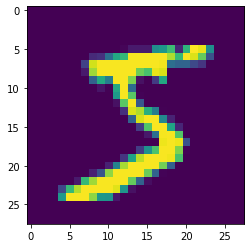

In [7]:
plt.imshow(x_train[0])

In [8]:
x_train = tf.keras.utils.normalize(x_train,axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

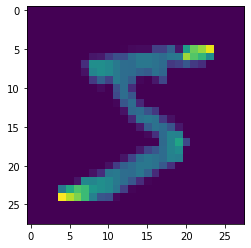

In [9]:
plt.imshow(x_train[0])

In [10]:
model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 12s 198us/sample - loss: 0.2675 - accuracy: 0.9227
Epoch 2/3
60000/60000 [==============================] - 8s 131us/sample - loss: 0.1088 - accuracy: 0.9664
Epoch 3/3
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0734 - accuracy: 0.9773
10000/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [11]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [15]:
pr = model.predict(x_train[0:70])

In [19]:
# plt.imshow(pr[69])
pr[69]
import numpy as np

print(np.argmax(pr[69]))

0


In [21]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [22]:
pred = new_model.predict(x_test)

In [24]:
print(np.argmax(pred[51]))

3


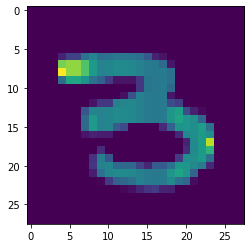

In [25]:
plt.imshow(x_test[51])